In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from time import time
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
rc_fonts = {
        "text.usetex": True,
        "font.size": 18,
        'mathtext.default': 'regular',
        'axes.titlesize': 18,
        "axes.labelsize": 18,
        "legend.fontsize": 18,
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        'figure.titlesize': 18,
        'figure.figsize': (7, 5),
        'text.latex.preamble': [r'\usepackage{amsmath,amssymb,bm,physics,lmodern}'],
        "font.family": "serif",
        "font.serif": "computer modern roman",
        }
mpl.rcParams.update(rc_fonts)

ModuleNotFoundError: No module named 'tensorflow'

## Load data

In [2]:
df = pd.read_csv("../dataset_2pbvp/data.csv")

def to_array(df):
    data = df.iloc[0:]
    return np.array(data)

FileNotFoundError: [Errno 2] No such file or directory: '../dataset_2pbvp/data.csv'

In [3]:
data = np.zeros((5,65))
data[0] = to_array(df['x'])
data[1] = to_array(df['u8'])
data[2] = to_array(df['u16'])
data[3] = to_array(df['u32'])
data[4] = to_array(df['u64'])

NameError: name 'to_array' is not defined

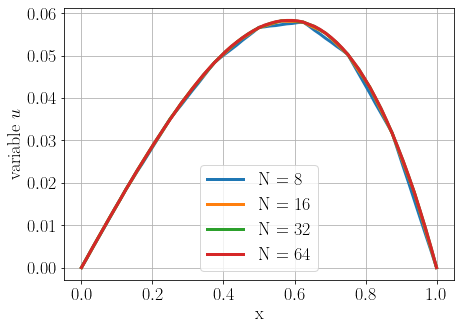

In [226]:
#plt.figure(figsize=(8, 6))
plt.plot(data[0], data[1], label="N = 8",  linewidth=3)
plt.plot(data[0], data[2], label="N = 16", linewidth=3)
plt.plot(data[0], data[3], label="N = 32", linewidth=3)
plt.plot(data[0], data[4], label="N = 64", linewidth=3)
plt.xlabel("x")
plt.ylabel("variable $u$")
plt.legend()
plt.grid()
plt.savefig(f"../results/data_plot/twopoint_bvp.jpg")
plt.show()

## ARIMA Forecasting

In [4]:
def arima_forecast(history):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    return float(model_fit.forecast())

In [5]:
# prepare data
train_data = data[:-1]
train_data = np.transpose(train_data)
train_data.shape

(65, 4)

In [6]:
test_data = data[-1]

In [7]:
# predict grid size 70
st = time()
predictions = []
for data_point in tqdm(train_data):
    predictions.append(arima_forecast(data_point))
print("Elapsed time:", time() - st)

NameError: name 'time' is not defined

In [8]:
def mean_relative_error(pred_data, true_data):
    return np.mean(np.abs(pred_data-true_data) / np.max(np.abs(true_data)))

loss_rmse: 5.2806370391404805e-05
loss_rele: 0.0010248440876767493


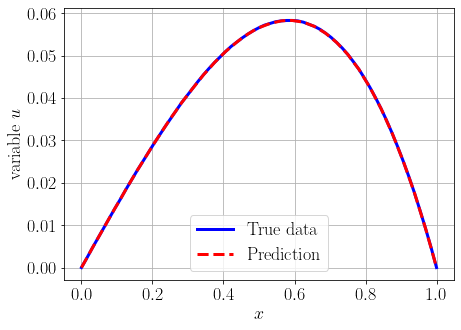

In [237]:
loss = rmse(predictions, test_data)
print("loss_rmse:", loss)

loss = mean_relative_error(predictions, test_data)
print("loss_rele:", loss)

plt.plot(data[0], test_data, color='blue', label="True data", linewidth=3)
plt.plot(data[0], predictions, color='red', linestyle="dashed", label="Prediction", linewidth=3)
plt.xlabel("$x$")
plt.ylabel("variable $u$")
plt.legend()
plt.grid()
plt.savefig(f"../results/study1_arima/approach4_momentum/arima_momentum_twopoint_bvp.jpg")
plt.show()

In [9]:
plt.plot(data[0], data[1], color='gray', label="Base line", linewidth=4)
plt.plot(data[0], data[2], color='gray', linewidth=4)
plt.plot(data[0], data[3], color='gray', linewidth=4)
plt.plot(data[0], predictions, color='red', linestyle="dashed", label="Prediction", linewidth=4)
plt.xlabel("$x$")
plt.ylabel("variable $u$")
plt.title("Prediction vs Base lines")
plt.legend()
plt.show()

NameError: name 'plt' is not defined